<div style="width: 100%; clear: both;">

<div style="float: left; width: 50%;">

<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">

</div>

<div style="float: right; width: 50%;">

<p style="margin: 0; padding-top: 22px; text-align:right;">M2.991 · Aprenentatge automàtic · PAC1</p>

<p style="margin: 0; text-align:right;">2024-1 · Màster universitari en Ciència de dades (Data science)</p>

<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>

</div>

</div>

<div style="width:100%;">&nbsp;</div>

<div style="text-align: center; font-size: 36px; font-weight: bold;">
  PAC 1: Preparació de dades
</div>

L'objectiu principal d'aquesta primera PAC és que us familiaritzeu amb l'entorn de treball que utilitzareu en la resta de pràctiques de l'assignatura. Aquest entorn estarà format per un conjunt de dependències relatives a certs mòduls de Python que seran necessaris per poder executar la vostra PAC de manera correcta. Aquestes dependències les gestionarem gràcies a l'ajuda d'Anaconda. Una altra de les eines fonamentals del que serà el vostre nou entorn de treball serà Jupyter, que us permetrà treballar amb Notebooks (fitxers *.ipynb) com el present enunciat.

Un altre dels aspectes més importants que cobrirem en aquesta primera PAC, tal com indica el títol, és el de la preparació de les dades. En aquesta PAC aprendrem a carregar un conjunt de dades o _dataset_ i ens ajudarem d'eines de visualització per comprendre millor com es distribueixen les dades amb l'objectiu d'entendre com podem treure'n profit. A més, ens acostumarem a treballar amb conjunts d'entrenament i de prova per confirmar si les conclusions que traiem sobre una part de les mostres es poden generalitzar i extrapolar a la resta.

En resum, en aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades seguint els passos llistats a continuació:
1. Càrrega d'un conjunt de dades (1 punt)
2. Anàlisi de les dades (2.5 punts)
<br>   2.1. Anàlisi estadístic bàsic
<br>   2.2. Anàlisi exploratori de les dades
3. Preprocessament de les dades (1.5 punts)
4. Reducció de la dimensionalitat (2.5 punts)
5. Conjunts desbalancejats de dades (2.5 punts)
<br>   5.1. _Oversampling_

**Important:** cada un dels exercicis pot suposar diversos minuts d'execució, per la qual cosa l'entrega s'ha de fer en format notebook i en format html, on es vegi el codi, els resultats i comentaris de cada exercici. Es pot exportar el notebook a html des del menú File $\to$ Download as $\to$ HTML.

**Important:** existeix un tipus de cel·la especial per a albergar text. Aquest tipus de cel·la us serà molt útil per respondre a les diferents preguntes teòriques plantejades al llarg de cada PAC. Per canviar el tipus de cel·la a aquest tipus, escolliu en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Important:** la solució plantejada no ha d'utilitzar mètodes, funcions o paràmetres declarats "deprecated" en futures versions.

**Important:** no oblideu posar el vostre nom i cognoms a la següent cel·la.

<div class="alert alert-block alert-info">
<strong>Nom i cognoms: Toni Vives Cabaleiro</strong>
</div>

Toni Vives Cabaleiro

Per la realització de la pràctica, necessitarem importar els següents mòduls:

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# Càrrega del conjunt de dades (1 punt)

Al llarg de tota la PAC treballarem amb el conjunt de dades anomenat _Bank Marketing_, que és un dels _datasets_ disponibles al [Repositori d'Aprenentatge Automàtic de la Universitat de Califòrnia a Irvine](https://archive.ics.uci.edu/).

A l'enllaç [https://archive.ics.uci.edu/dataset/222/bank+marketing] teniu disponible tant el conjunt de dades _Bank Marketing_ esmentat com tota la informació rellevant necessària per comprendre millor amb quin tipus de dades treballarem. En resum, les dades d'aquest _dataset_ estan relacionades amb campanyes de màrqueting directe (trucades telefòniques) d'una institució bancària portuguesa. L'objectiu que es busca en aquest conjunt de dades és predir si el client contractarà un dipòsit a termini o no (variable _y_).

En primer lloc, haureu de carregar al Notebook el conjunt de dades amb el qual treballarem durant la resta de la PAC. Per fer-ho, podeu descarregar-lo manualment des de l'enllaç referit prèviament, tot i que us aconsellem que instal·leu i utilitzeu el mòdul _ucimlrepo_ tal com s'explica a la pàgina del _dataset_.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> carregueu el conjunt de dades "Bank Marketing" i mostreu:

<ul>
  <li>El nombre i els noms dels atributs descriptius (variables que podrien ser utilitzades per predir la variable objectiu "y").</li>
  <li>El nombre de files (mostres) del conjunt de dades.</li>
  <li>Verifiqueu si hi ha "missing values", i si és així, en quines columnes.</li>
</ul>

Suggeriment: si utilitzeu ucimlrepo, exploreu els atributs _metadata_ i _variables_ de l'objecte obtingut.
    
Suggeriment: separeu el conjunt de dades original en les variables "X" (atributs descriptius) i "y" (variable objectiu), tot i que potser us sigui útil en algun moment tenir-les també en un únic DataFrame combinat.
</div>

Començarem analitzant la informació que ens mostra el propi dataset en el repositori d'Aprenentatge Automàtic de la Universitat de Califòrnia a Irvine:

**Taula de variables**

| Nom de la variable | Rol            | Tipus     | Demogràfic        | Descripció                                                                                                                             |
|--------------------|----------------|-----------|-------------------|----------------------------------------------------------------------------------------------------------------------------------------|
| edat               | Característica  | Enter     | Edat              |                                                                                                                                         |
| feina              | Característica  | Categòric | Ocupació          | Tipus de feina (categòric: 'administrador', 'obrer', 'empresari', 'empleat domèstic', 'gerent', 'jubilat', 'autònom', 'serveis', 'estudiant', 'tècnic', 'aturat', 'desconegut') |
| estat civil        | Característica  | Categòric | Estat civil       | Estat civil (categòric: 'divorciat', 'casat', 'solter', 'desconegut'; nota: 'divorciat' significa divorciat o vidu)                    |
| educació           | Característica  | Categòric | Nivell d'educació | (categòric: 'bàsic.4a', 'bàsic.6a', 'bàsic.9a', 'batxillerat', 'analfabet', 'curs professional', 'títol universitari', 'desconegut')    |
| per defecte        | Característica  | Binari    |                   | Té crèdit en mora?                                                                                                                      |
| saldo              | Característica  | Enter     |                   | Saldo mitjà anual                                                                                                                       |
| habitatge          | Característica  | Binari    |                   | Té préstec hipotecari?                                                                                                                  |
| préstec            | Característica  | Binari    |                   | Té préstec personal?                                                                                                                    |
| contacte           | Característica  | Categòric |                   | Tipus de comunicació de contacte (categòric: 'mòbil', 'telèfon')                                                                        |
| dia_de_la_setmana  | Característica  | Data      |                   | Últim dia de contacte de la setmana                                                                                                     |
| mes                | Característica  | Data      |                   | Últim mes de contacte de l'any (categòric: 'gen', 'feb', 'mar', ..., 'nov', 'des')                                                      |
| durada             | Característica  | Enter     |                   | Durada de l'últim contacte, en segons (numèric). Nota: Aquest atribut afecta considerablement el resultat final. Si la durada és 0, el resultat és "no". Aquesta entrada s'ha d'incloure només amb finalitats de referència i s'ha de descartar si es vol un model predictiu realista. |
| campanya           | Característica  | Enter     |                   | Nombre de contactes realitzats durant aquesta campanya i per aquest client (numèric, inclou l'últim contacte)                           |
| dies de pau        | Característica  | Enter     |                   | Nombre de dies des que es va contactar per última vegada al client d'una campanya anterior (numèric; -1 significa que el client no va ser contactat prèviament) |
| anterior           | Característica  | Enter     |                   | Nombre de contactes realitzats abans d'aquesta campanya i per aquest client.                                                            |
| resultat           | Característica  | Categòric |                   | Resultat de la campanya de màrqueting anterior (categòric: 'fracàs', 'inexistent', 'èxit')                                              |
| y                  | Objectiu       | Binari    |                   | El client ha subscrit un dipòsit a termini?                                                                                             |


In [2]:
# importem el dataset
# Atenent a que el repositori entrega 4 datasets, agafarem el de "bank-additional-full.csv", doncs es el que conté més dades.

df = pd.read_csv("bank-full.csv",delimiter=';')
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


Com podem observar, les dades venen separades per ";", per això li hem afegit el delimiter, ja que per default el valor que porta es "/t".

Per altre banda, veiem que les dades que hem mostrat a l'inici (les que mostra el repositori), són antigues doncs només tenien 17 atributs. El dataset més actualitzat conté més dades obtenint així un total de 20 atributs.


In [3]:
print("size = ", df.shape)
df.describe()



size =  (45211, 17)


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


amb aquesta descripció de les dades numèriques, podem veure que hi ha una gran diversitat entre els valors de les dades, fet que per poder-los comparar, possiblement caldrà aplicar una normalització de les dades.

Podem observar com a l'imprimir el shape, podem veure que te 41188 files per 21 columnes, fet que amb el recompte podem veure que hi son totes les dades.

In [4]:
#observem els tipus de dades que tenim
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# confirmem que no hi ha dades faltants
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> El conjunt de dades proposat correspon a un problema d'aprenentatge automàtic supervisat o no?; Si és el cas, de quin tipus d'aprenentatge supervisat estaríem parlant?
</div>

Tal com diu el repositori:

"Les dades estan relacionades amb campanyes de màrqueting directe (trucades telefòniques) d'una institució bancària portuguesa. L'objectiu de la classificació és predir si el client subscriurà un dipòsit a termini (variable y)."

al tenir la variable y com a etiqueta, podem definir el problema com a un **poroblema d'aprenentatge automàtic supervisat**.

i tal com diu l'enunciat del repositori, l'objectiu es classificar si el client subscriurà o no un dipòsit a termini, per tant es una classificació d'una variable binària. 

Es tracta d'un problema d'aprenentatge automàtic supervisat de **classificació**.

# Anàlisi de les dades (2.5 punts)

En aquest apartat visualitzarem cadascuna de les columnes o _features_ del conjunt de dades per comprendre millor quina distribució tenen.

## Anàlisi estadística bàsica

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> realitzeu un anàlisi estadística bàsica: 
<ul>
  <li>Variables categòriques:</li>
     <ul>
      <li>Calculeu la freqüència.</li>
      <li>Feu un gràfic de barres per cada variable.</li>
    </ul>
  <li>Variables numèriques:</li>
    <ul>
      <li>Calculeu estadístics descriptius bàsics: mitjana, mediana, desviació estàndard, ...</li>
      <li>Feu un histograma per a cada variable.</li>
    </ul>
</ul>
Suggeriment: podeu utilitzar la llibreria "pandas" i les seves funcions "describe" i "value_counts", així com les funcions "bar", "hist" i "hist2d" de <i>matplotlib</i>.
</div>

### Variables categòriques

A continuació començarem mostrant els gràfics de les variables categòriques.

Com hem vist anteriorment, els tipus de dades que tenim son o bé del format "object", o del format "int64". Ens aprofitarem d'aquesta informació per tal de separar els arrays de categories i els de valors numèrics.

In [6]:
#seleccionem les variables categoriques del dataframe
categorical_columns = df.select_dtypes(include=['object']).columns


A continuació recorrerem tot l'array i per cada variable, imprimirem el recompte de valors (freqüència).

In [7]:
for categoric_variable in categorical_columns:
    print(df[categoric_variable].value_counts())
    print("suma de valors = ",df[categoric_variable].value_counts().sum())

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
suma de valors =  45211
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
suma de valors =  45211
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
suma de valors =  45211
default
no     44396
yes      815
Name: count, dtype: int64
suma de valors =  45211
housing
yes    25130
no     20081
Name: count, dtype: int64
suma de valors =  45211
loan
no     37967
yes     7244
Name: count, dtype: int64
suma de valors =  45211
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
suma de valors =  45211
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970

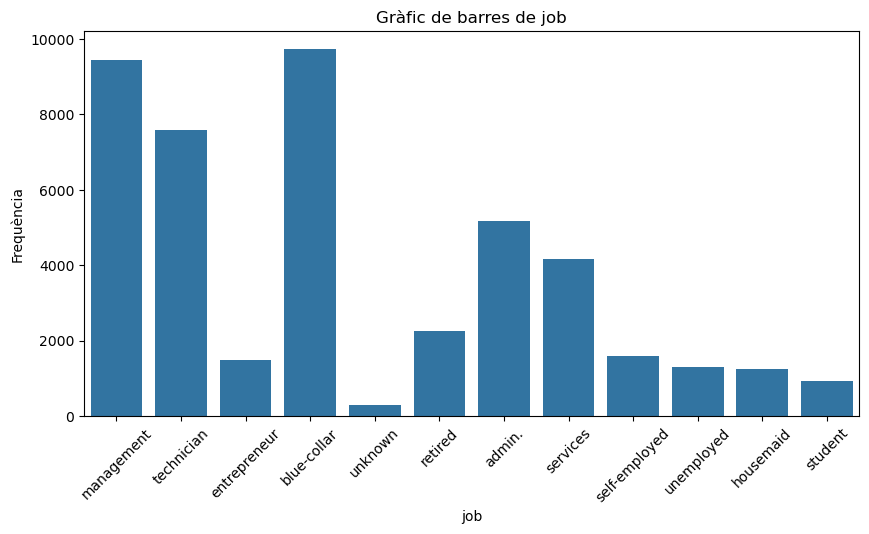

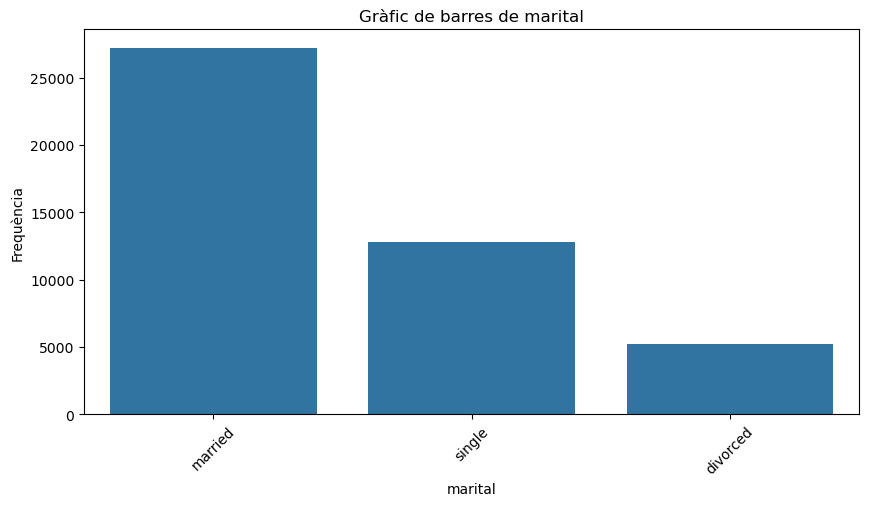

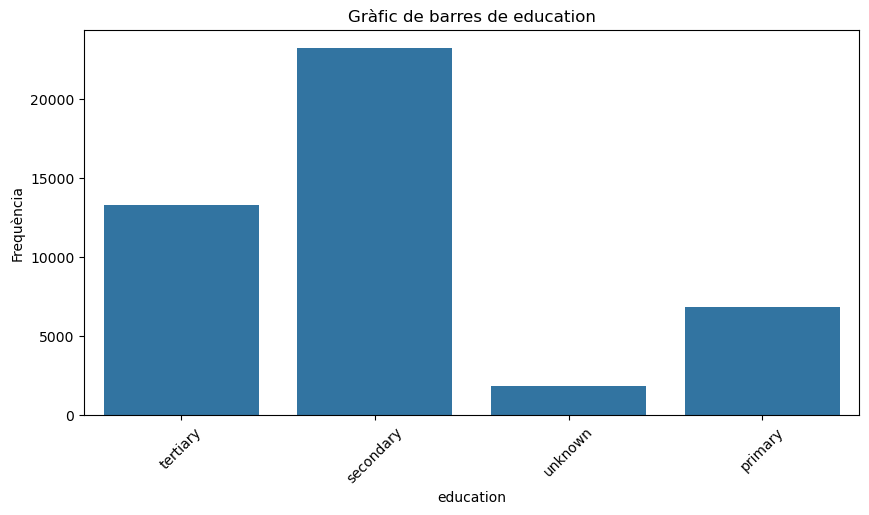

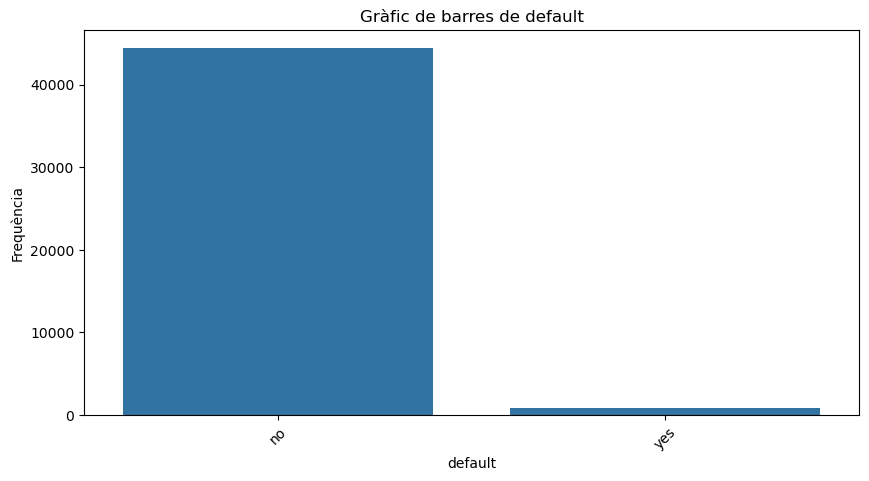

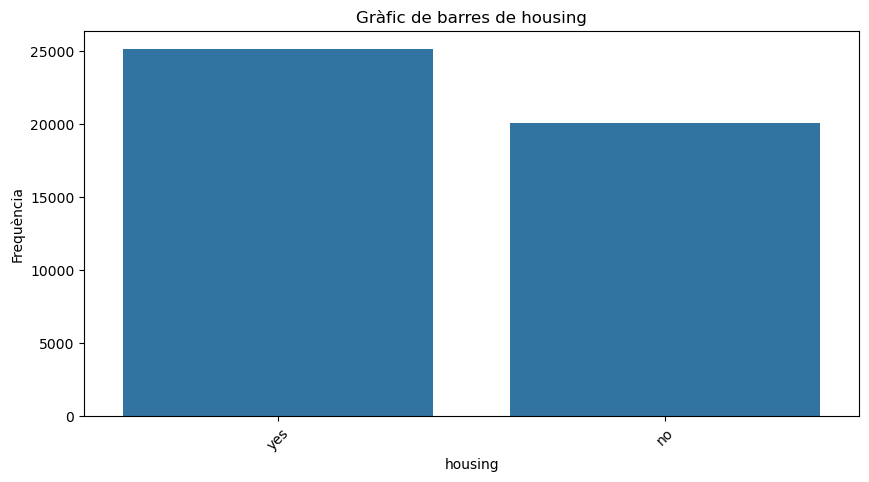

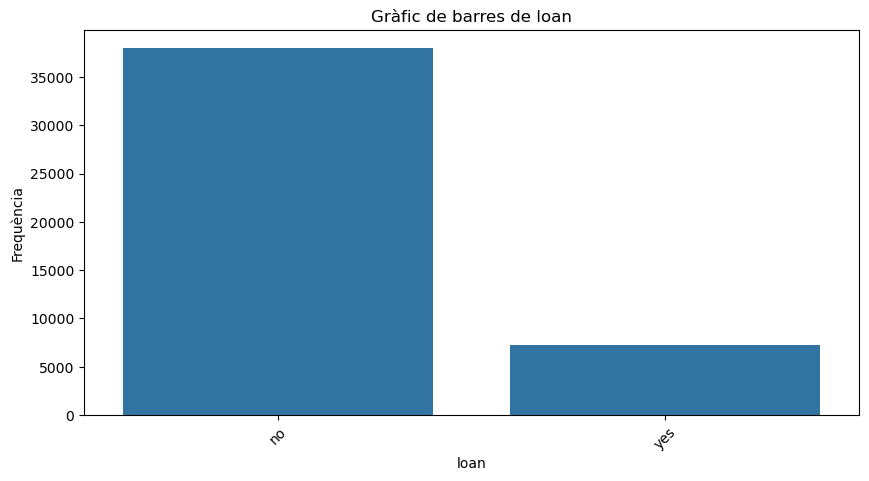

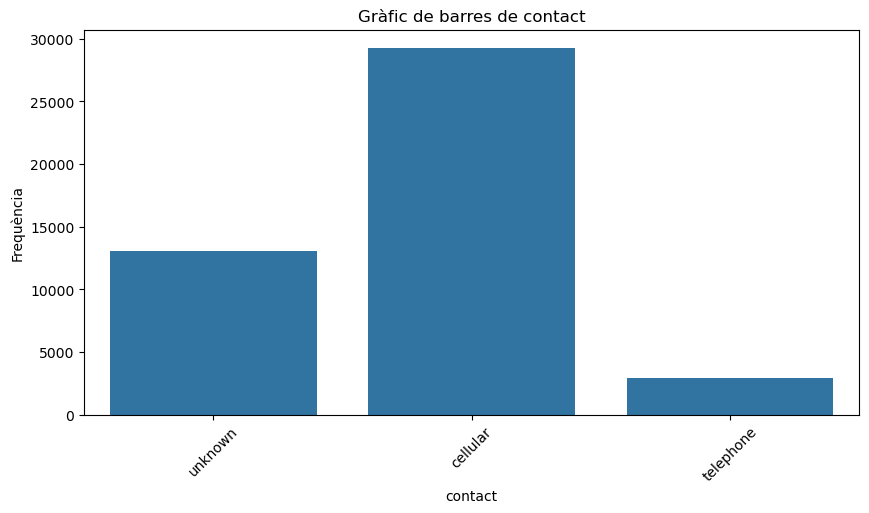

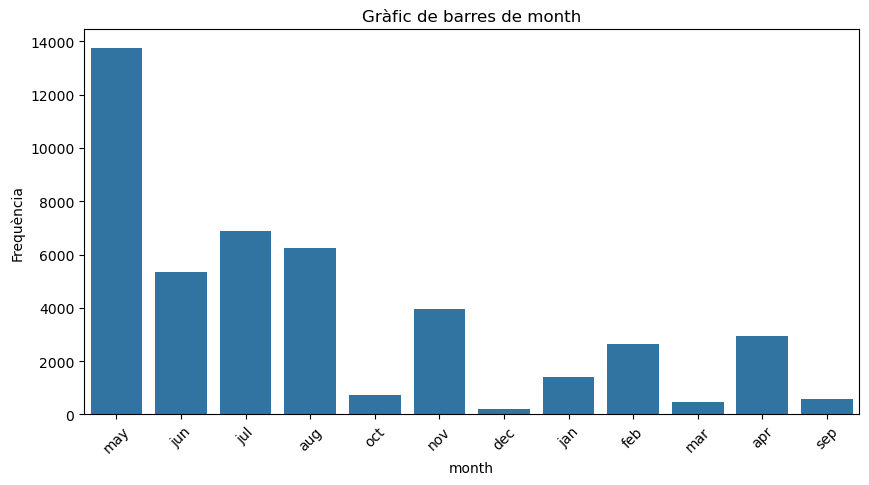

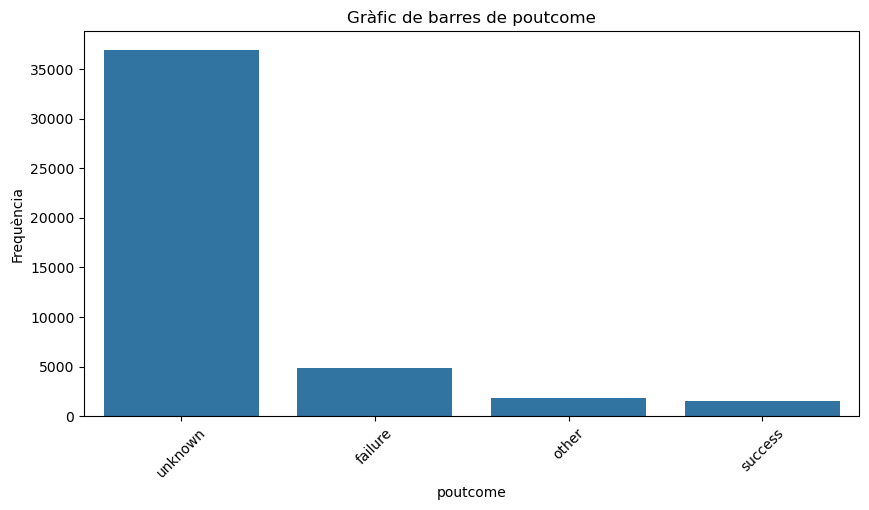

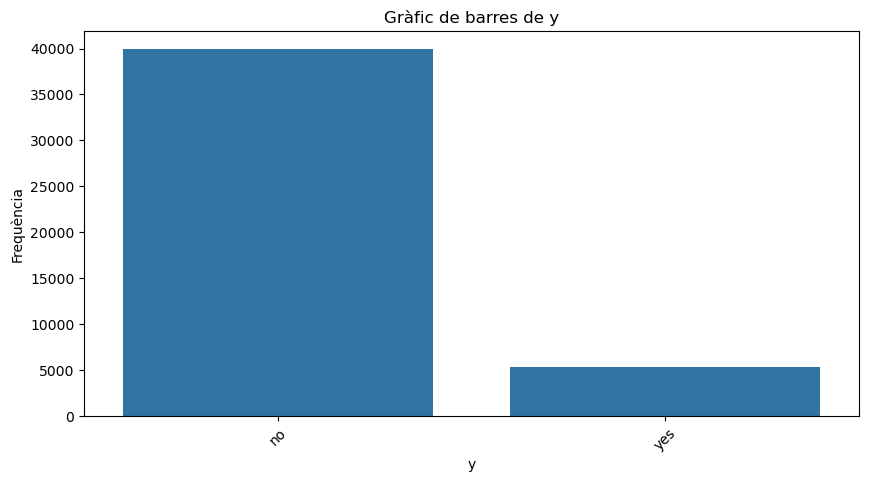

In [8]:
#recorrem el array de categorical_columns i fem el gràfic de barres corresponent
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[column])
    plt.title(f'Gràfic de barres de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequència')
    plt.xticks(rotation=45)
    plt.show()


Gràcies als gràfics, podem representar i visualitzar les dades de forma més senzilla i entenedora.

### Variables numèriques

Realitzarem el mateix procès que abans, però aquest cop amb variables numèriques de tipus "int64"

In [9]:
#seleccionem les variables numèriques del dataframe
numeric_columns = df.select_dtypes(include=['int64']).columns

In [10]:
for numeric_variable in numeric_columns:
    print(df[numeric_variable].value_counts())
    print("suma de valors = ",df[numeric_variable].value_counts().sum())

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
95       2
93       2
92       2
88       2
94       1
Name: count, Length: 77, dtype: int64
suma de valors =  45211
balance
0        3514
1         195
2         156
4         139
3         134
         ... 
14204       1
8205        1
9710        1
7038        1
4416        1
Name: count, Length: 7168, dtype: int64
suma de valors =  45211
day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64
suma de valors =  45211
duration
124     188
90      184
89      177
104     175
114     175
       ... 
1286      1
1380      1
1723      1
2184      1
1233      1
Name: count, Length: 1573, dtype: int64
suma de val

A continuació mostrem els valors estadístics més importants de cada variable numèrica.

In [11]:
df[numeric_columns].describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


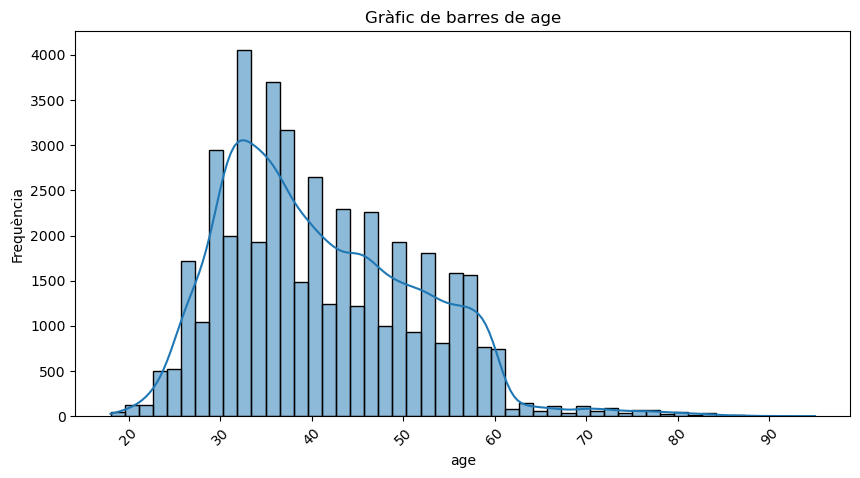

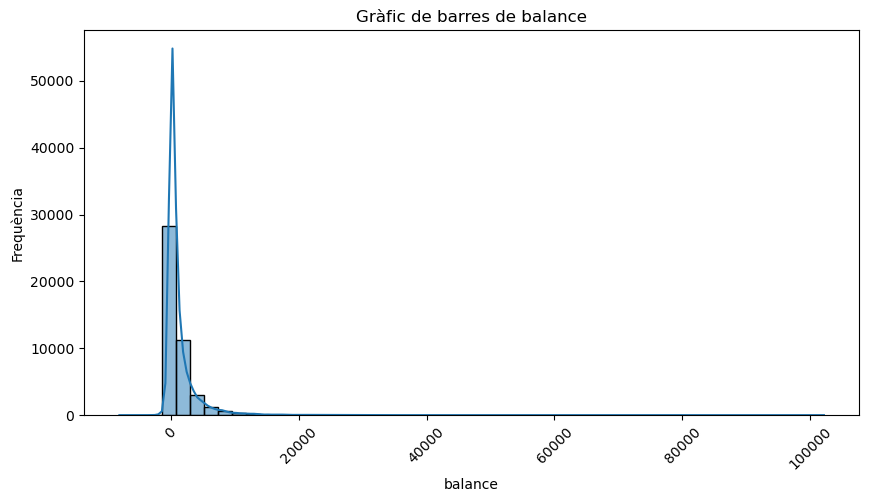

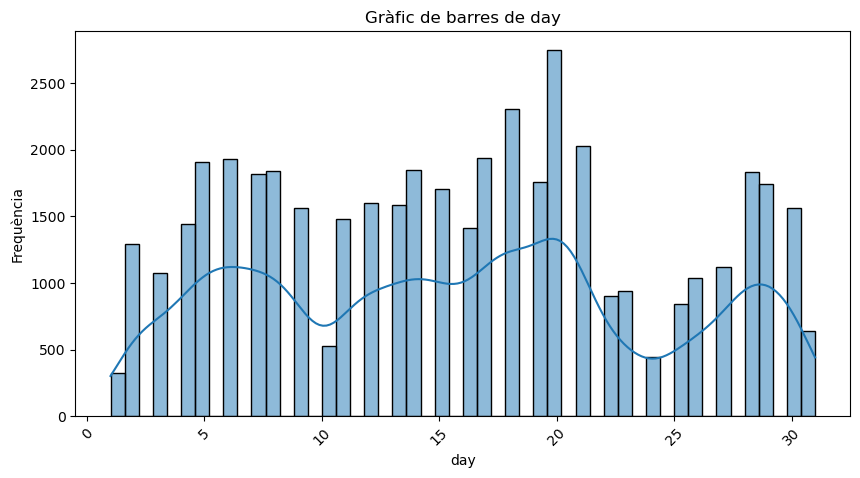

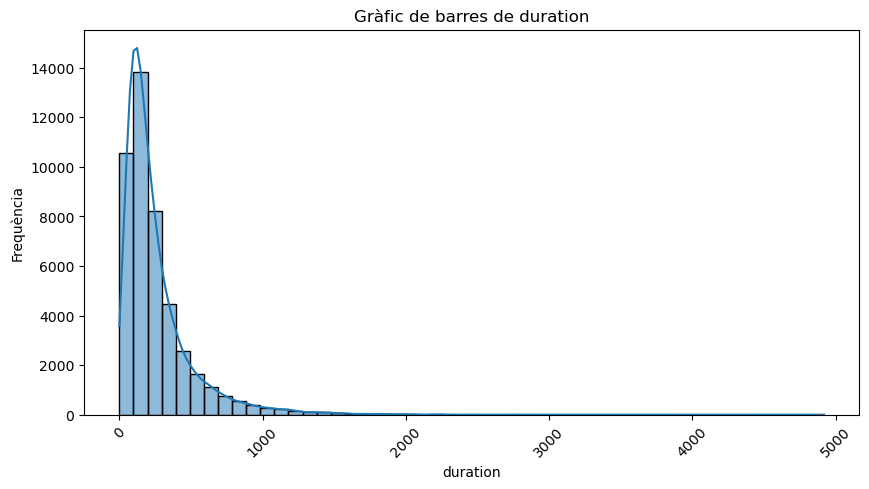

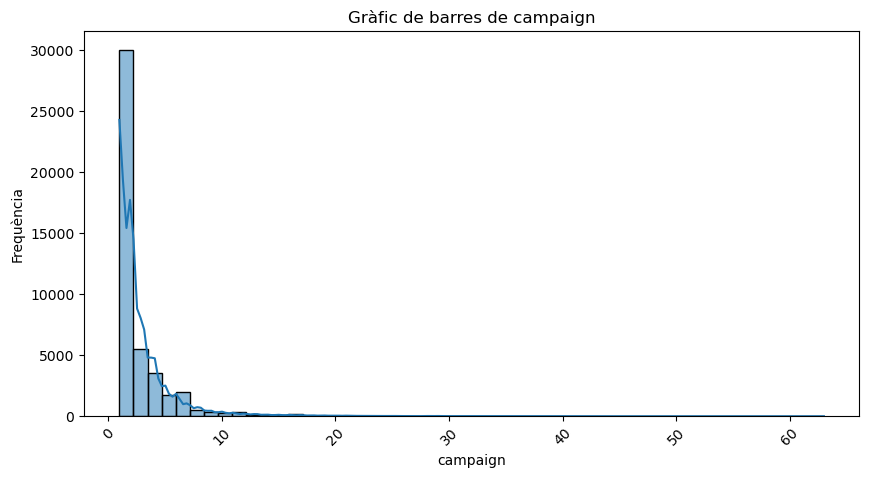

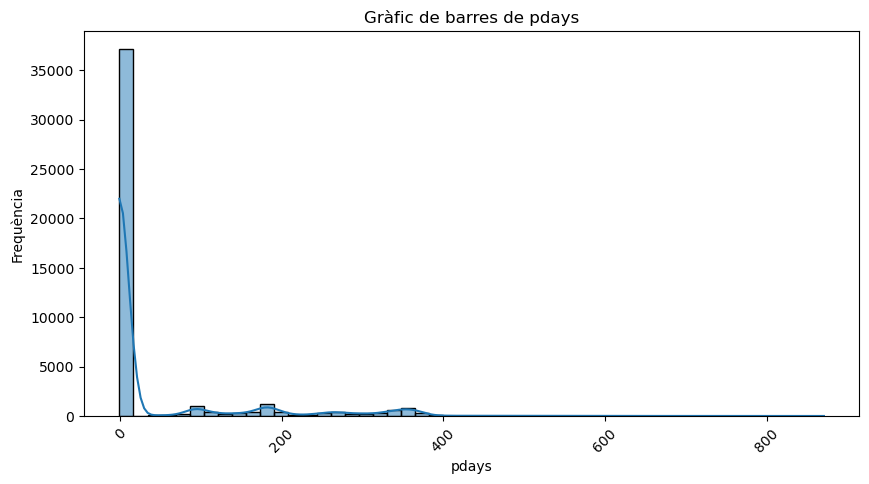

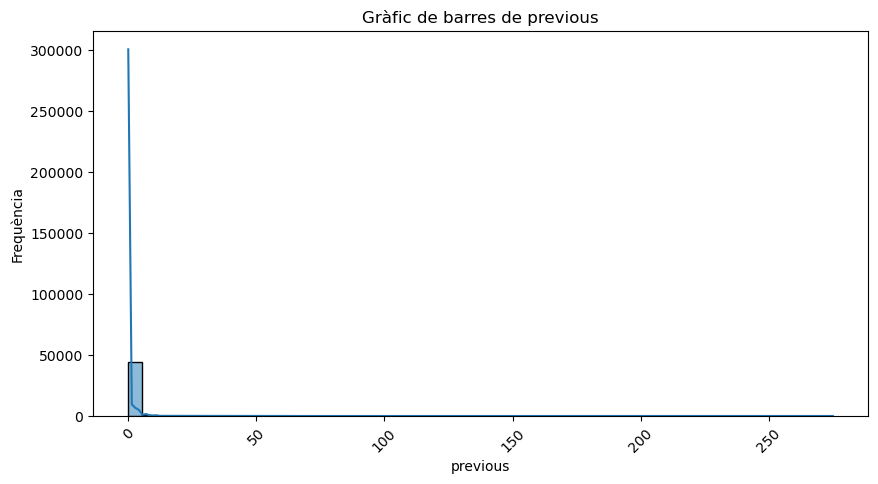

In [12]:
#recorrem el array de numeric_columns i fem el gràfic de barres corresponent
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=df[column],kde=True,bins=50)
    plt.title(f'Gràfic de barres de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequència')
    plt.xticks(rotation=45)
    plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> comenteu els resultats.
</div>

## Anàlisi exploratòria de les dades

En aquest subapartat explorarem gràficament la relació dels atributs descriptius amb la variable objectiu i analitzarem les diferents correlacions.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> utilitzant una llibreria gràfica, com ara <i>matplotlib</i>, per a cadascuna de les variables categòriques, superposeu en un mateix gràfic el diagrama de barres per a cada valor possible de la variable objectiu, diferenciant amb un color diferent segons el valor de "y", és a dir, quan sigui "no" o quan sigui "yes". Afegiu una llegenda per saber a quina classe correspon cada histograma.
    
La finalitat és observar com es distribueix cadascun dels atributs en funció de la classe que tenen, per poder identificar de manera visual i ràpida si alguns atributs ens permeten predir millor que altres el valor de la variable objectiu.
    
<hr>
Suggeriment: podeu utilitzar el paràmetre "alpha" en els gràfics perquè es puguin apreciar els dos histogrames.
</div>

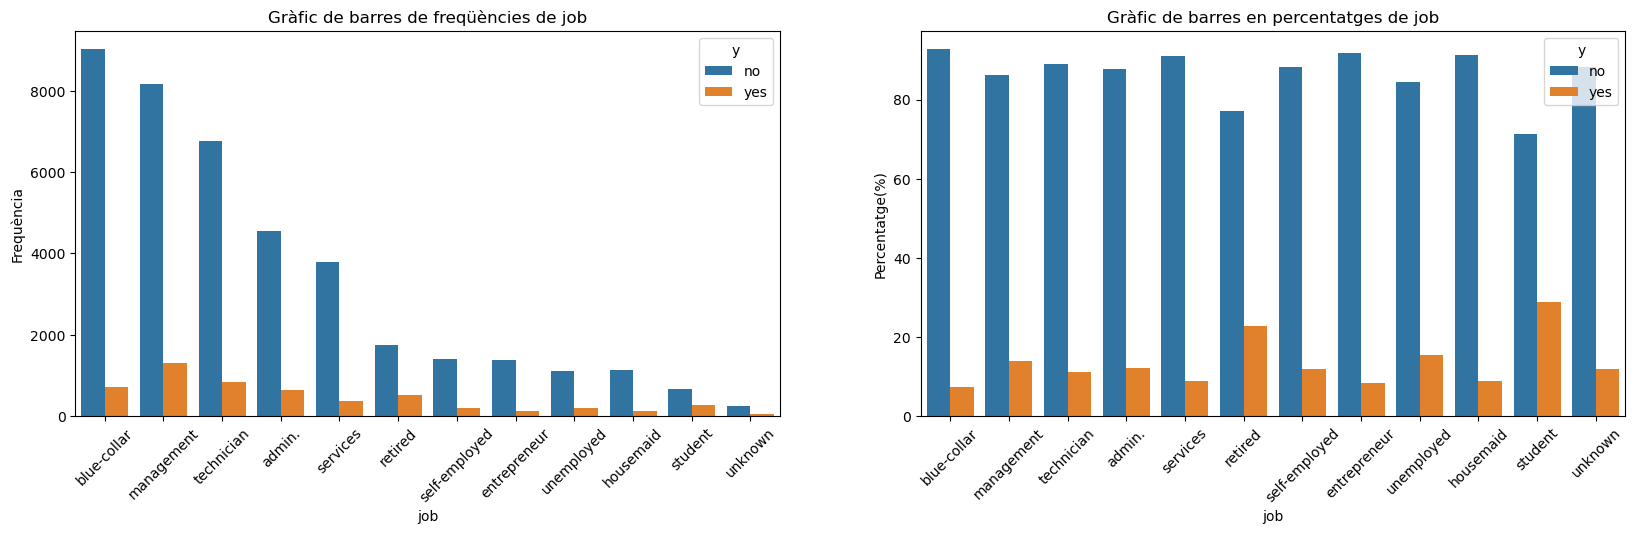

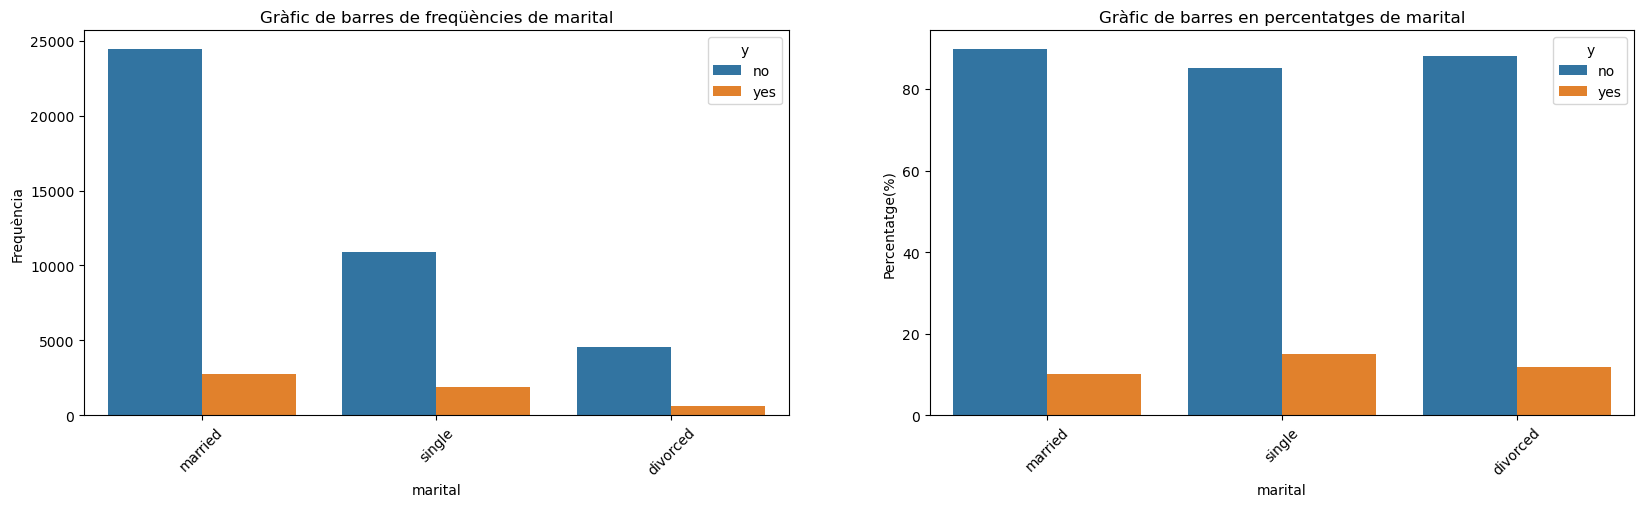

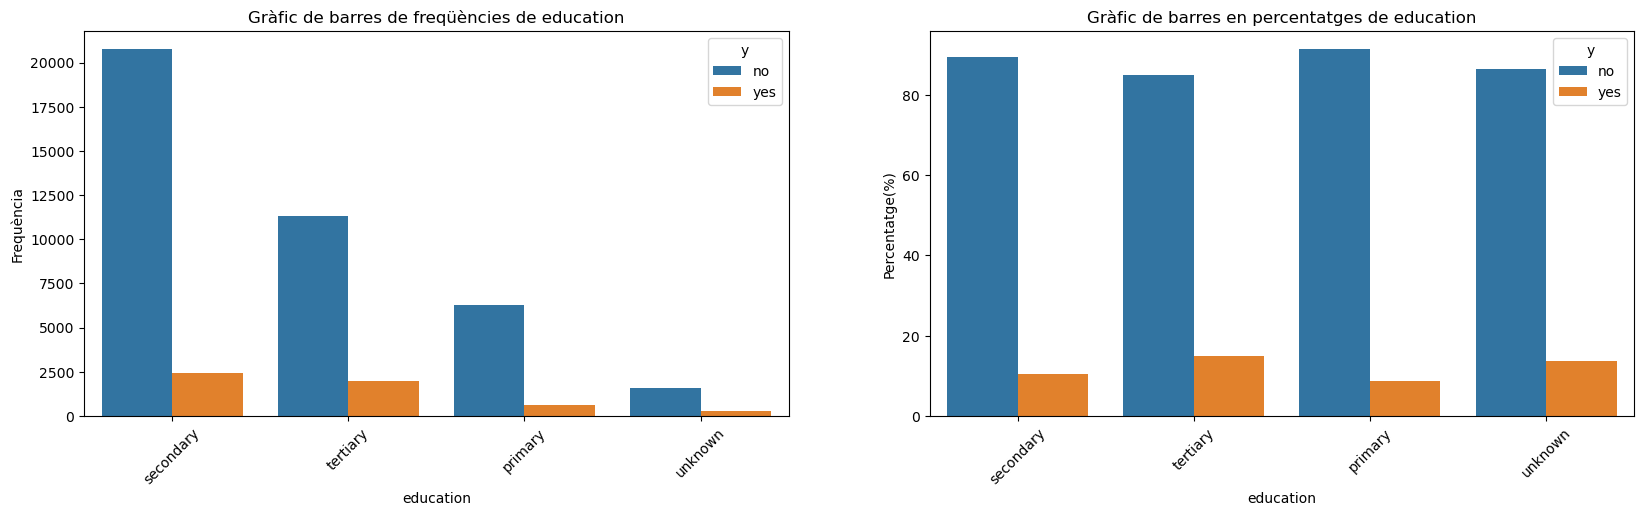

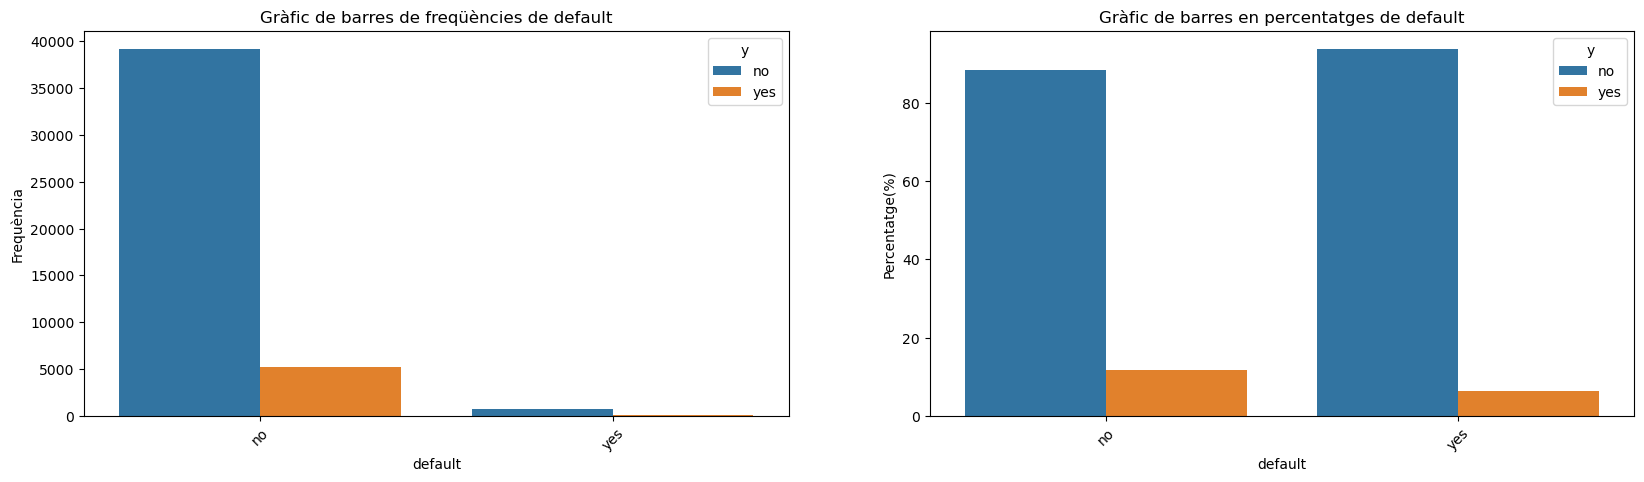

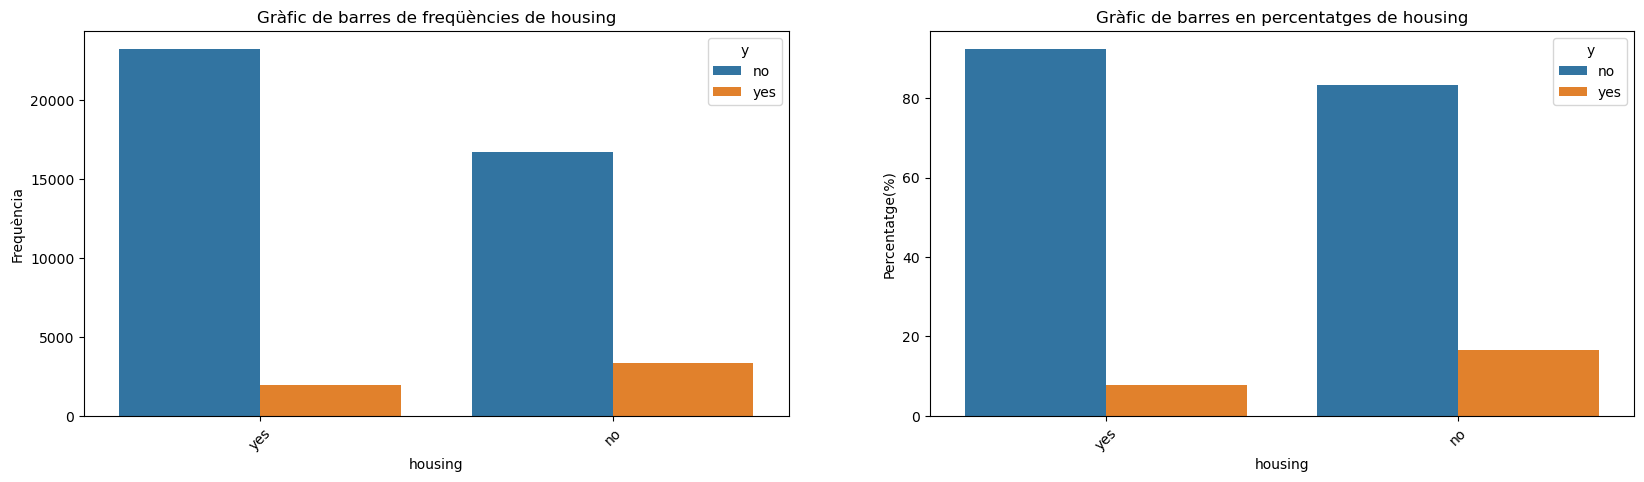

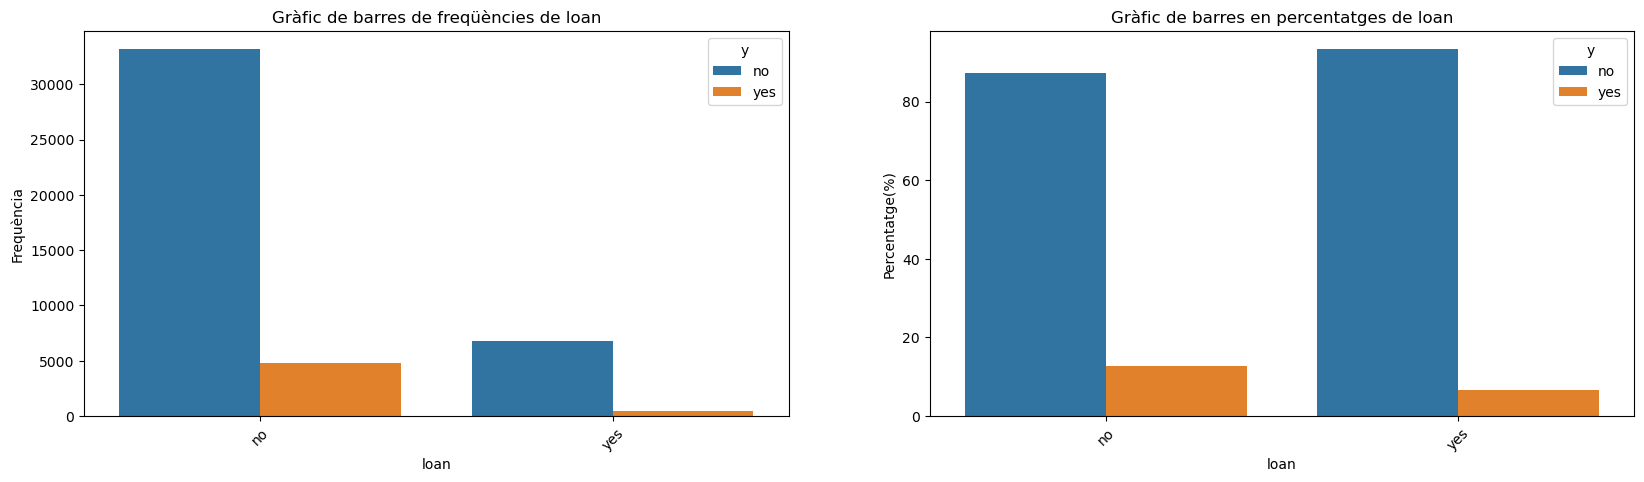

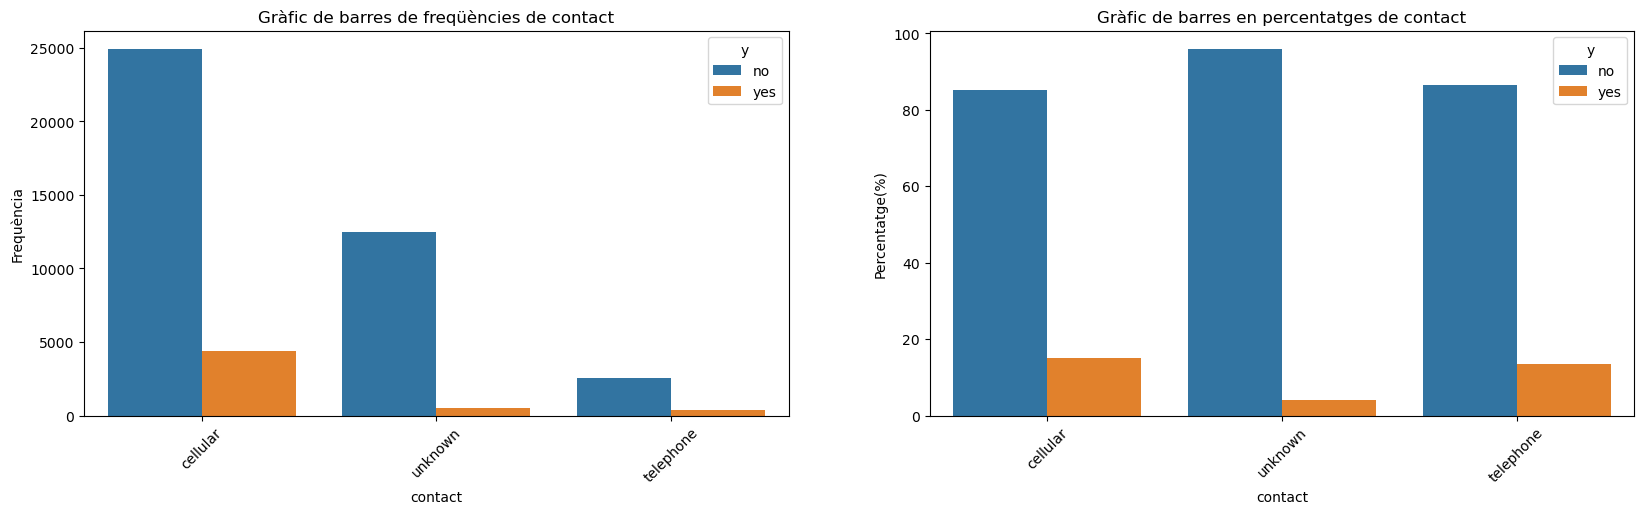

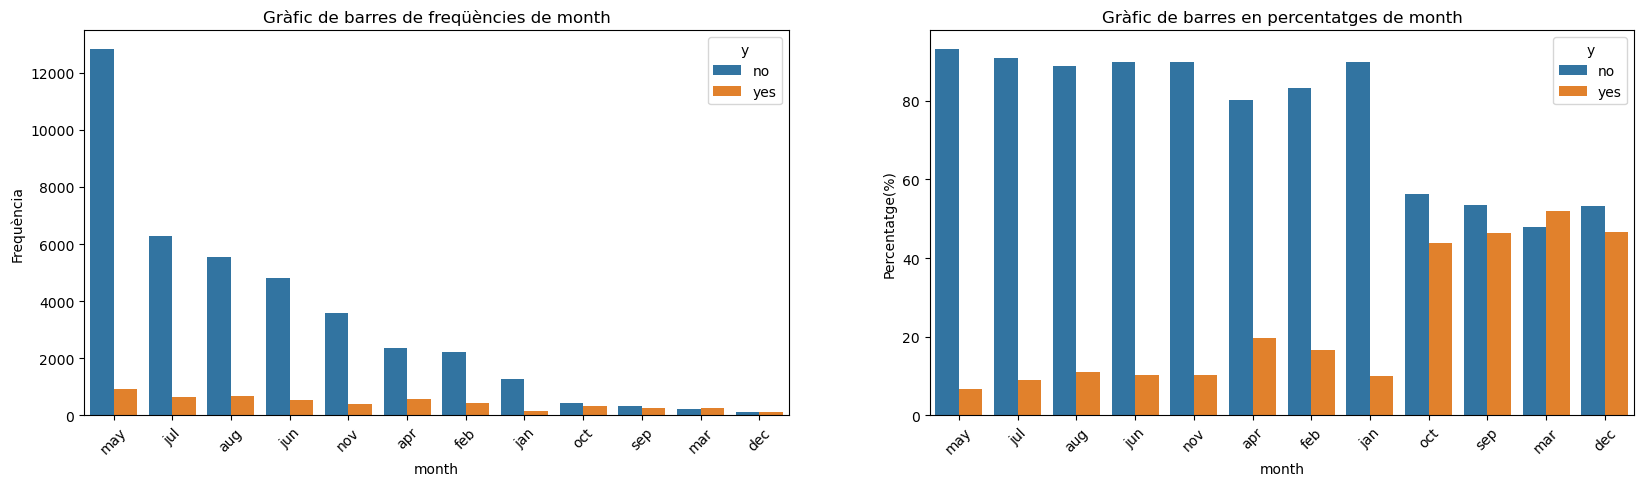

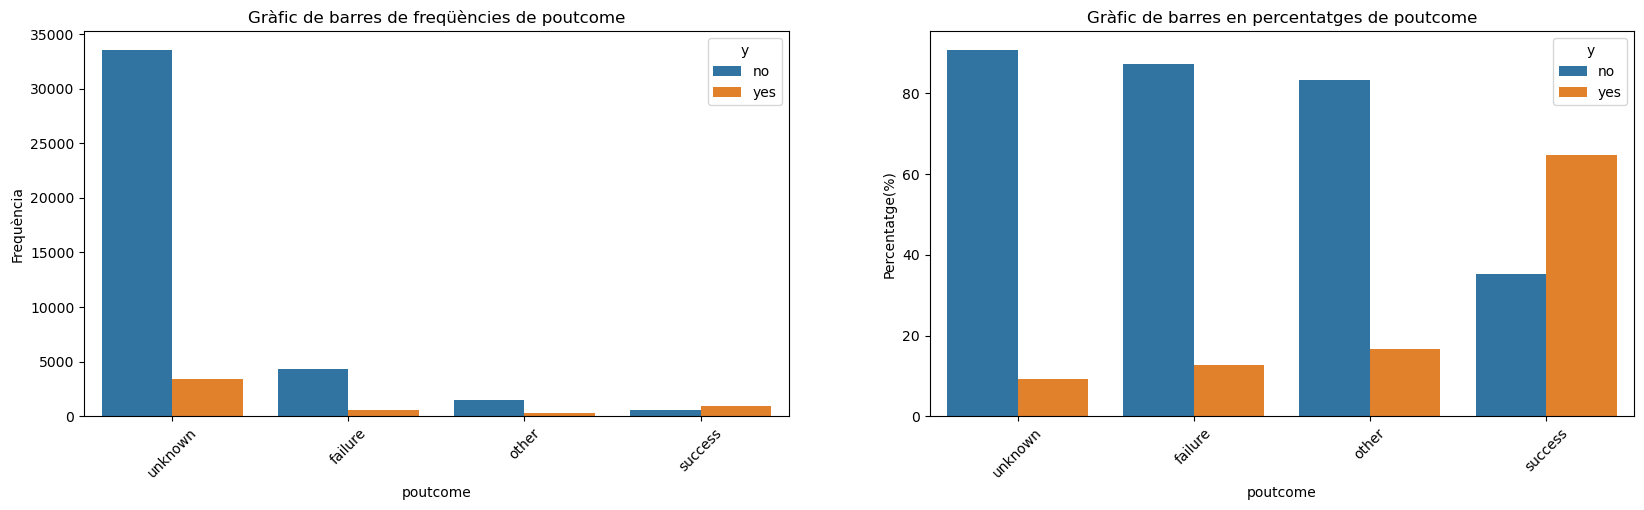

In [13]:
for column in categorical_columns[:-1]:
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    
    # Obtenim l'ordre de l'eix de les "X"
    freq_order = df[column].value_counts().index
    
    # gràfic de freqüència
    sns.countplot(x=df[column], hue=df["y"], ax=axes[0], order=freq_order)
    axes[0].set_title(f'Gràfic de barres de freqüències de {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequència')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Calculem els percentatges
    counts = df.groupby([column, 'y'], observed=True).size().unstack(fill_value=0)
    percentages = counts.apply(lambda x: 100 * x / x.sum(), axis=1)
    
    # Reorganitzem les dades
    percentages = percentages.stack().reset_index().rename(columns={0: 'percentatge'})
    
    # grafiquem les dades segons el seu percentatge
    sns.barplot(x=percentages[column], y=percentages['percentatge'], hue=percentages['y'], ax=axes[1], order=freq_order)
    axes[1].set_title(f'Gràfic de barres en percentatges de {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Percentatge(%)')
    axes[1].tick_params(axis='x', rotation=45)
    
  
    plt.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> de la mateixa manera que en l'exercici anterior, superposeu els histogrames per als diferents valors de "y" per a cada variable numèrica.
</div>

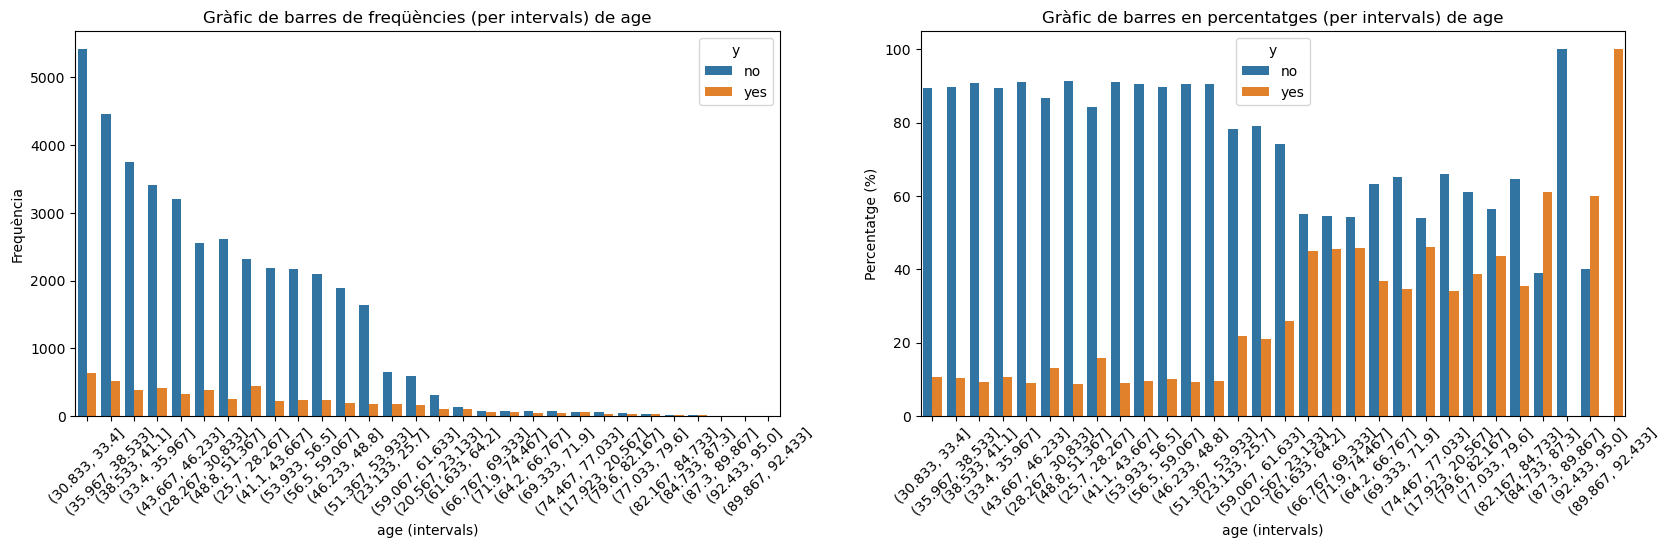

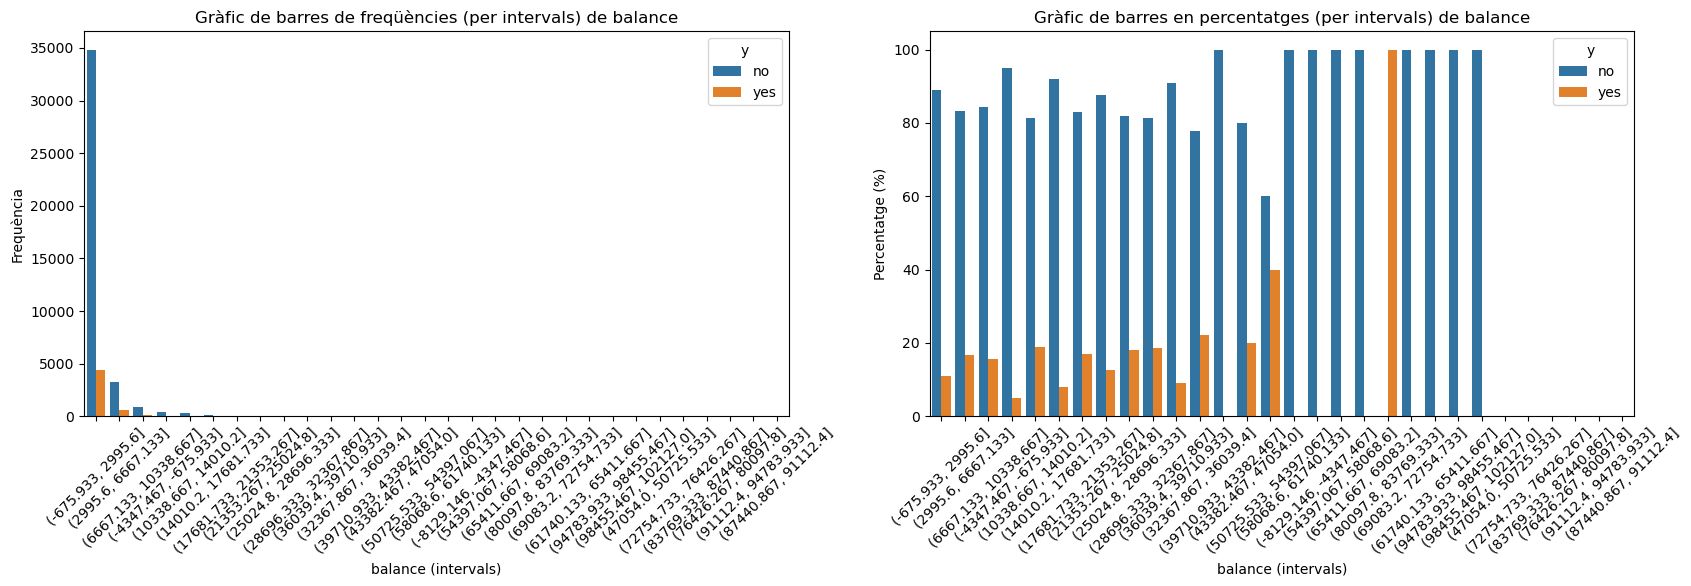

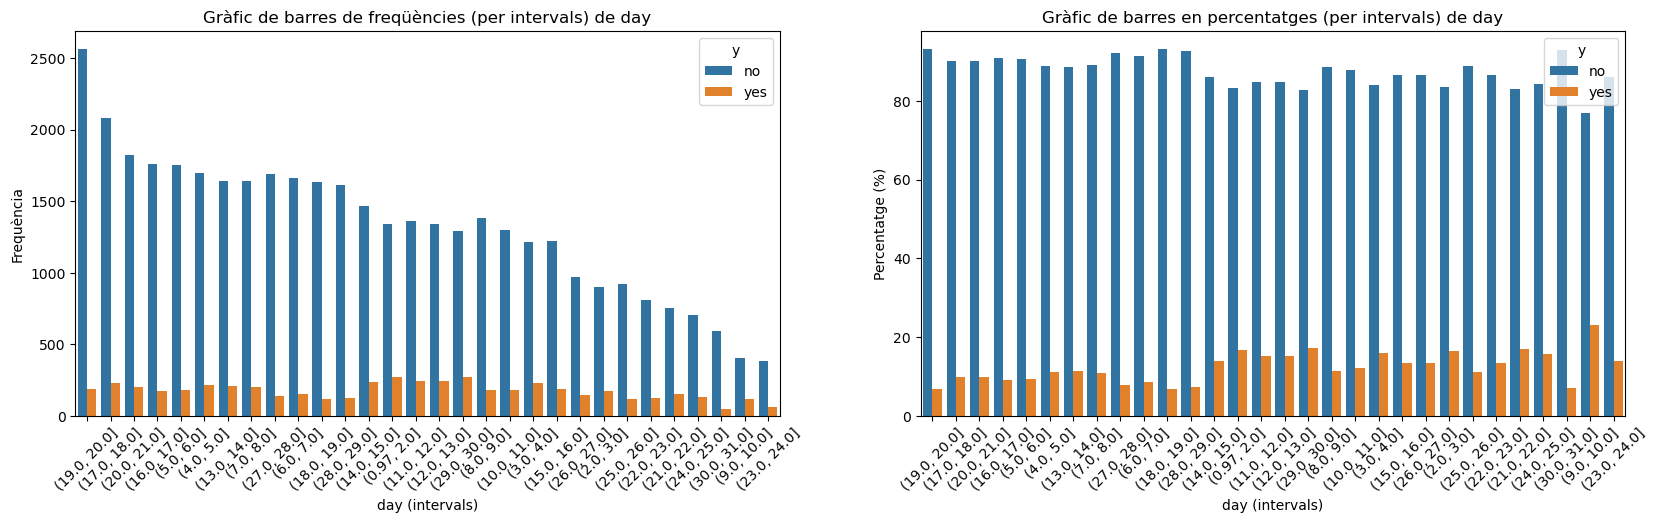

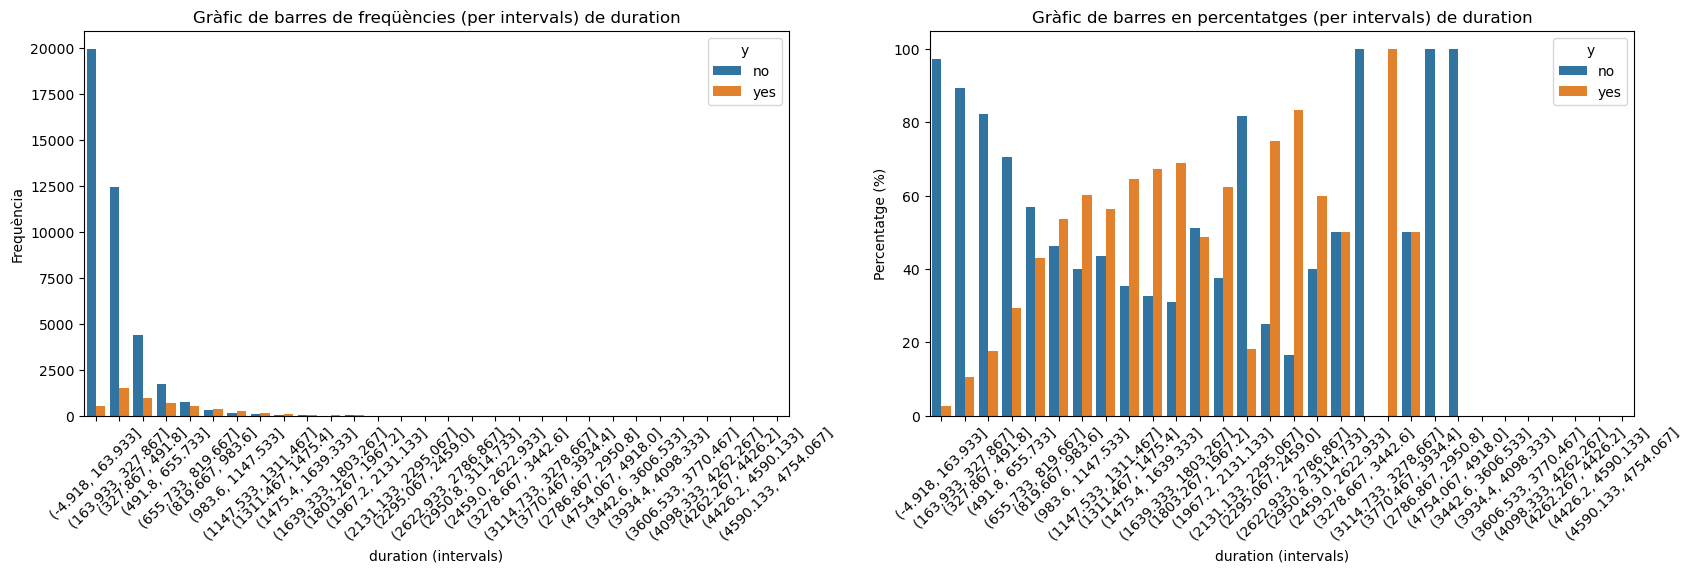

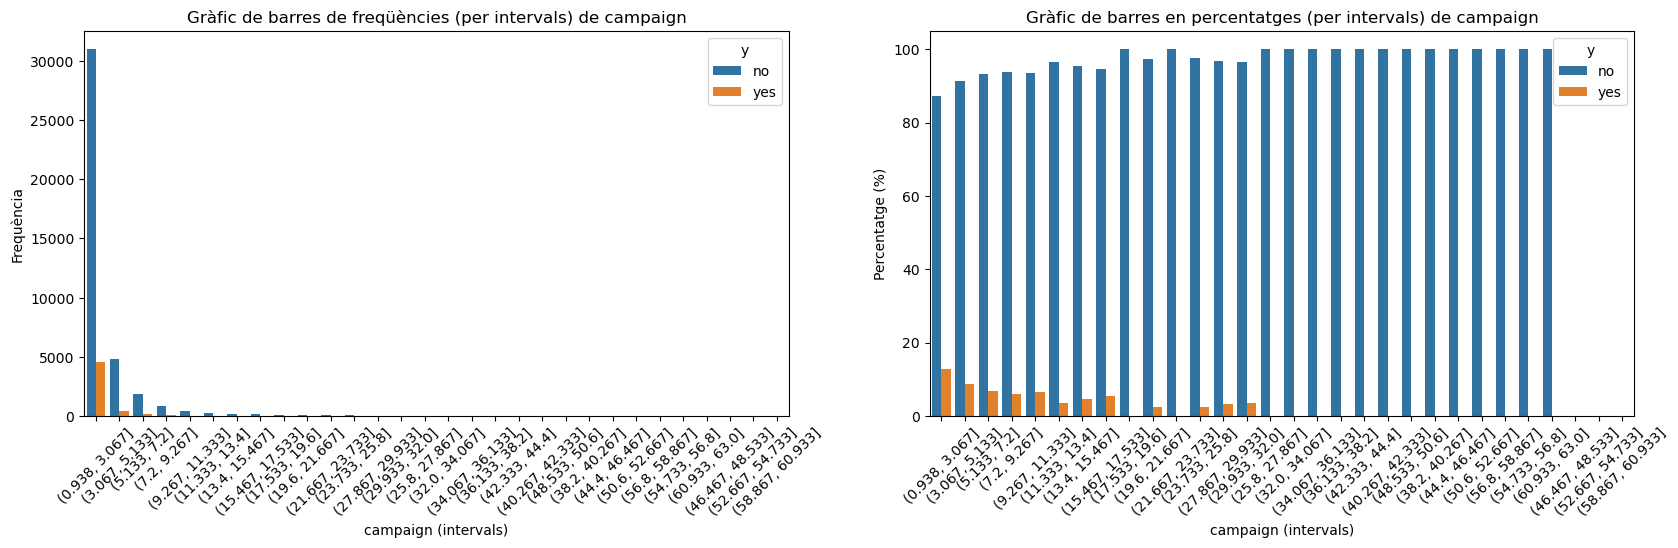

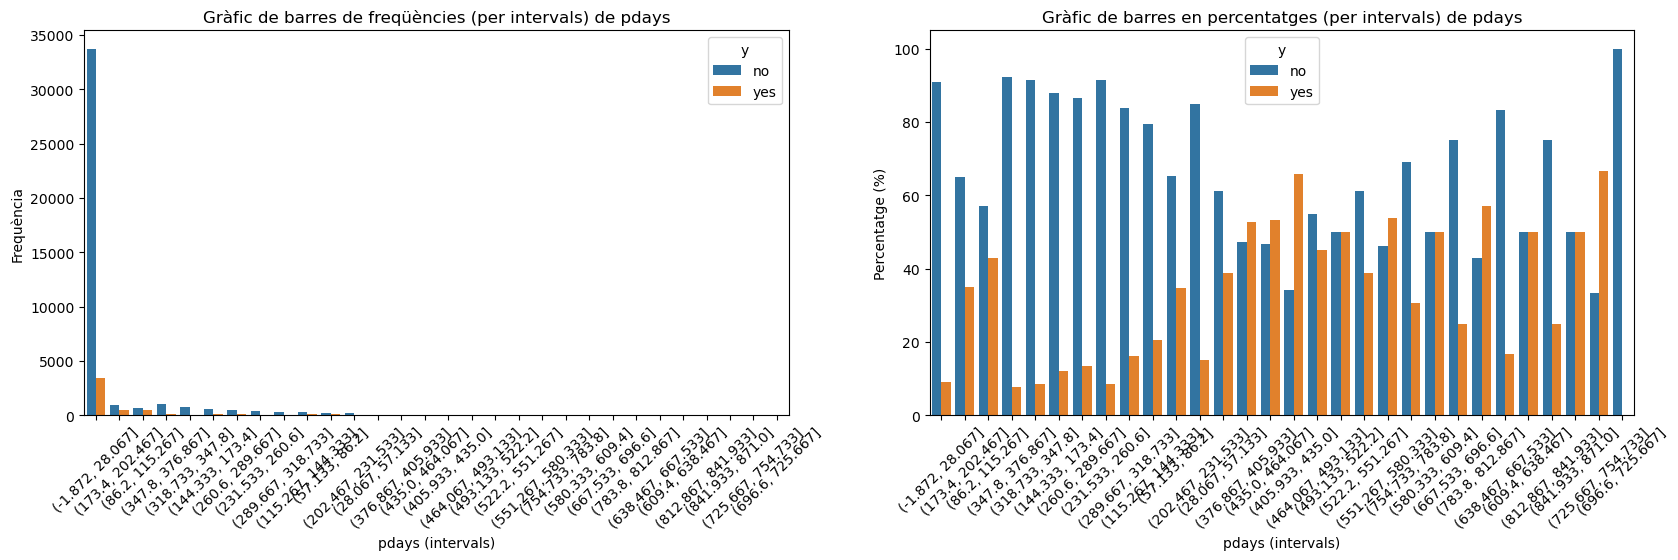

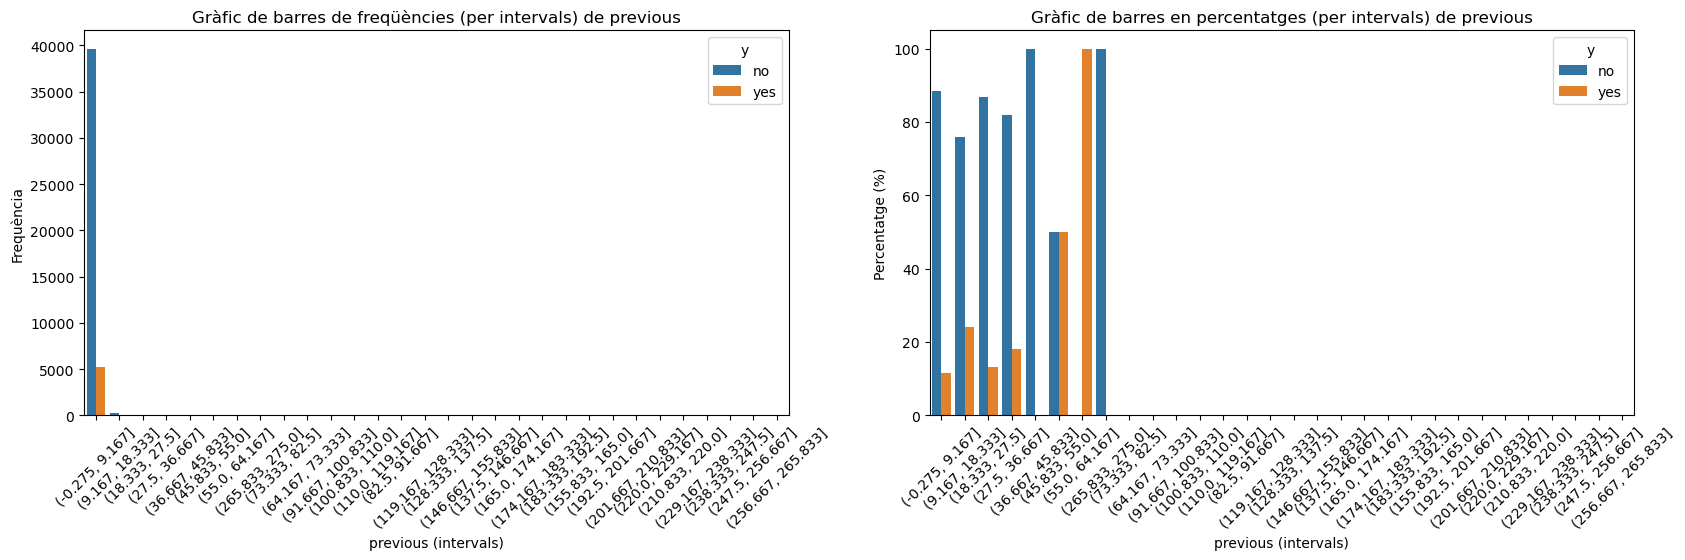

In [14]:
for column in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(20, 5))
    
    # Dividim la variable en intervals (bins)
    df[f'{column}_bins'] = pd.cut(df[column], bins=30)
    
    # Obtenim l'ordre de l'eix X basat en les freqüències
    bin_order = df[f'{column}_bins'].value_counts().index
    
    # Gràfic de barres amb les freqüències per intervals
    sns.countplot(x=df[f'{column}_bins'], hue=df["y"], ax=axes[0], order=bin_order)
    axes[0].set_title(f'Gràfic de barres de freqüències (per intervals) de {column}')
    axes[0].set_xlabel(f'{column} (intervals)')
    axes[0].set_ylabel('Frequència')
    axes[0].tick_params(axis='x', rotation=45)
    
    counts = df.groupby([f'{column}_bins', 'y'], observed=True).size().unstack(fill_value=0)
    percentages = counts.apply(lambda x: 100 * x / x.sum(), axis=1)
    
    # Reorganitzem les dades
    percentages = percentages.stack().reset_index().rename(columns={0: 'percentatge'})
    
    # Gràfic de barres amb percentatges per intervals
    sns.barplot(x=percentages[f'{column}_bins'], y=percentages['percentatge'], hue=percentages['y'], ax=axes[1], order=bin_order)
    axes[1].set_title(f'Gràfic de barres en percentatges (per intervals) de {column}')
    axes[1].set_xlabel(f'{column} (intervals)')
    axes[1].set_ylabel('Percentatge (%)')
    axes[1].tick_params(axis='x', rotation=45)
    

    plt.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong>
<br> Mirant els gràfics de barres i els histogrames, quins atributs semblen tenir més pes al moment de predir si es contractarà un dipòsit a termini o no? Creus que amb aquests atributs serà suficient per poder determinar si es contractarà o no el dipòsit?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> calculeu i mostreu la correlació entre les variables numèriques.
</div>

en el moment de correlacionar dades, em sembla molt interessant mostrar primer tots els gràfics enfrentats i després fer la matriu de correlació. Per fer-ho, utilitzarem Label Encoding per aportar un valor numèric a les variables categòriques.

Text(0.5, 0.98, 'Relació entre variables numèriques del dataset')

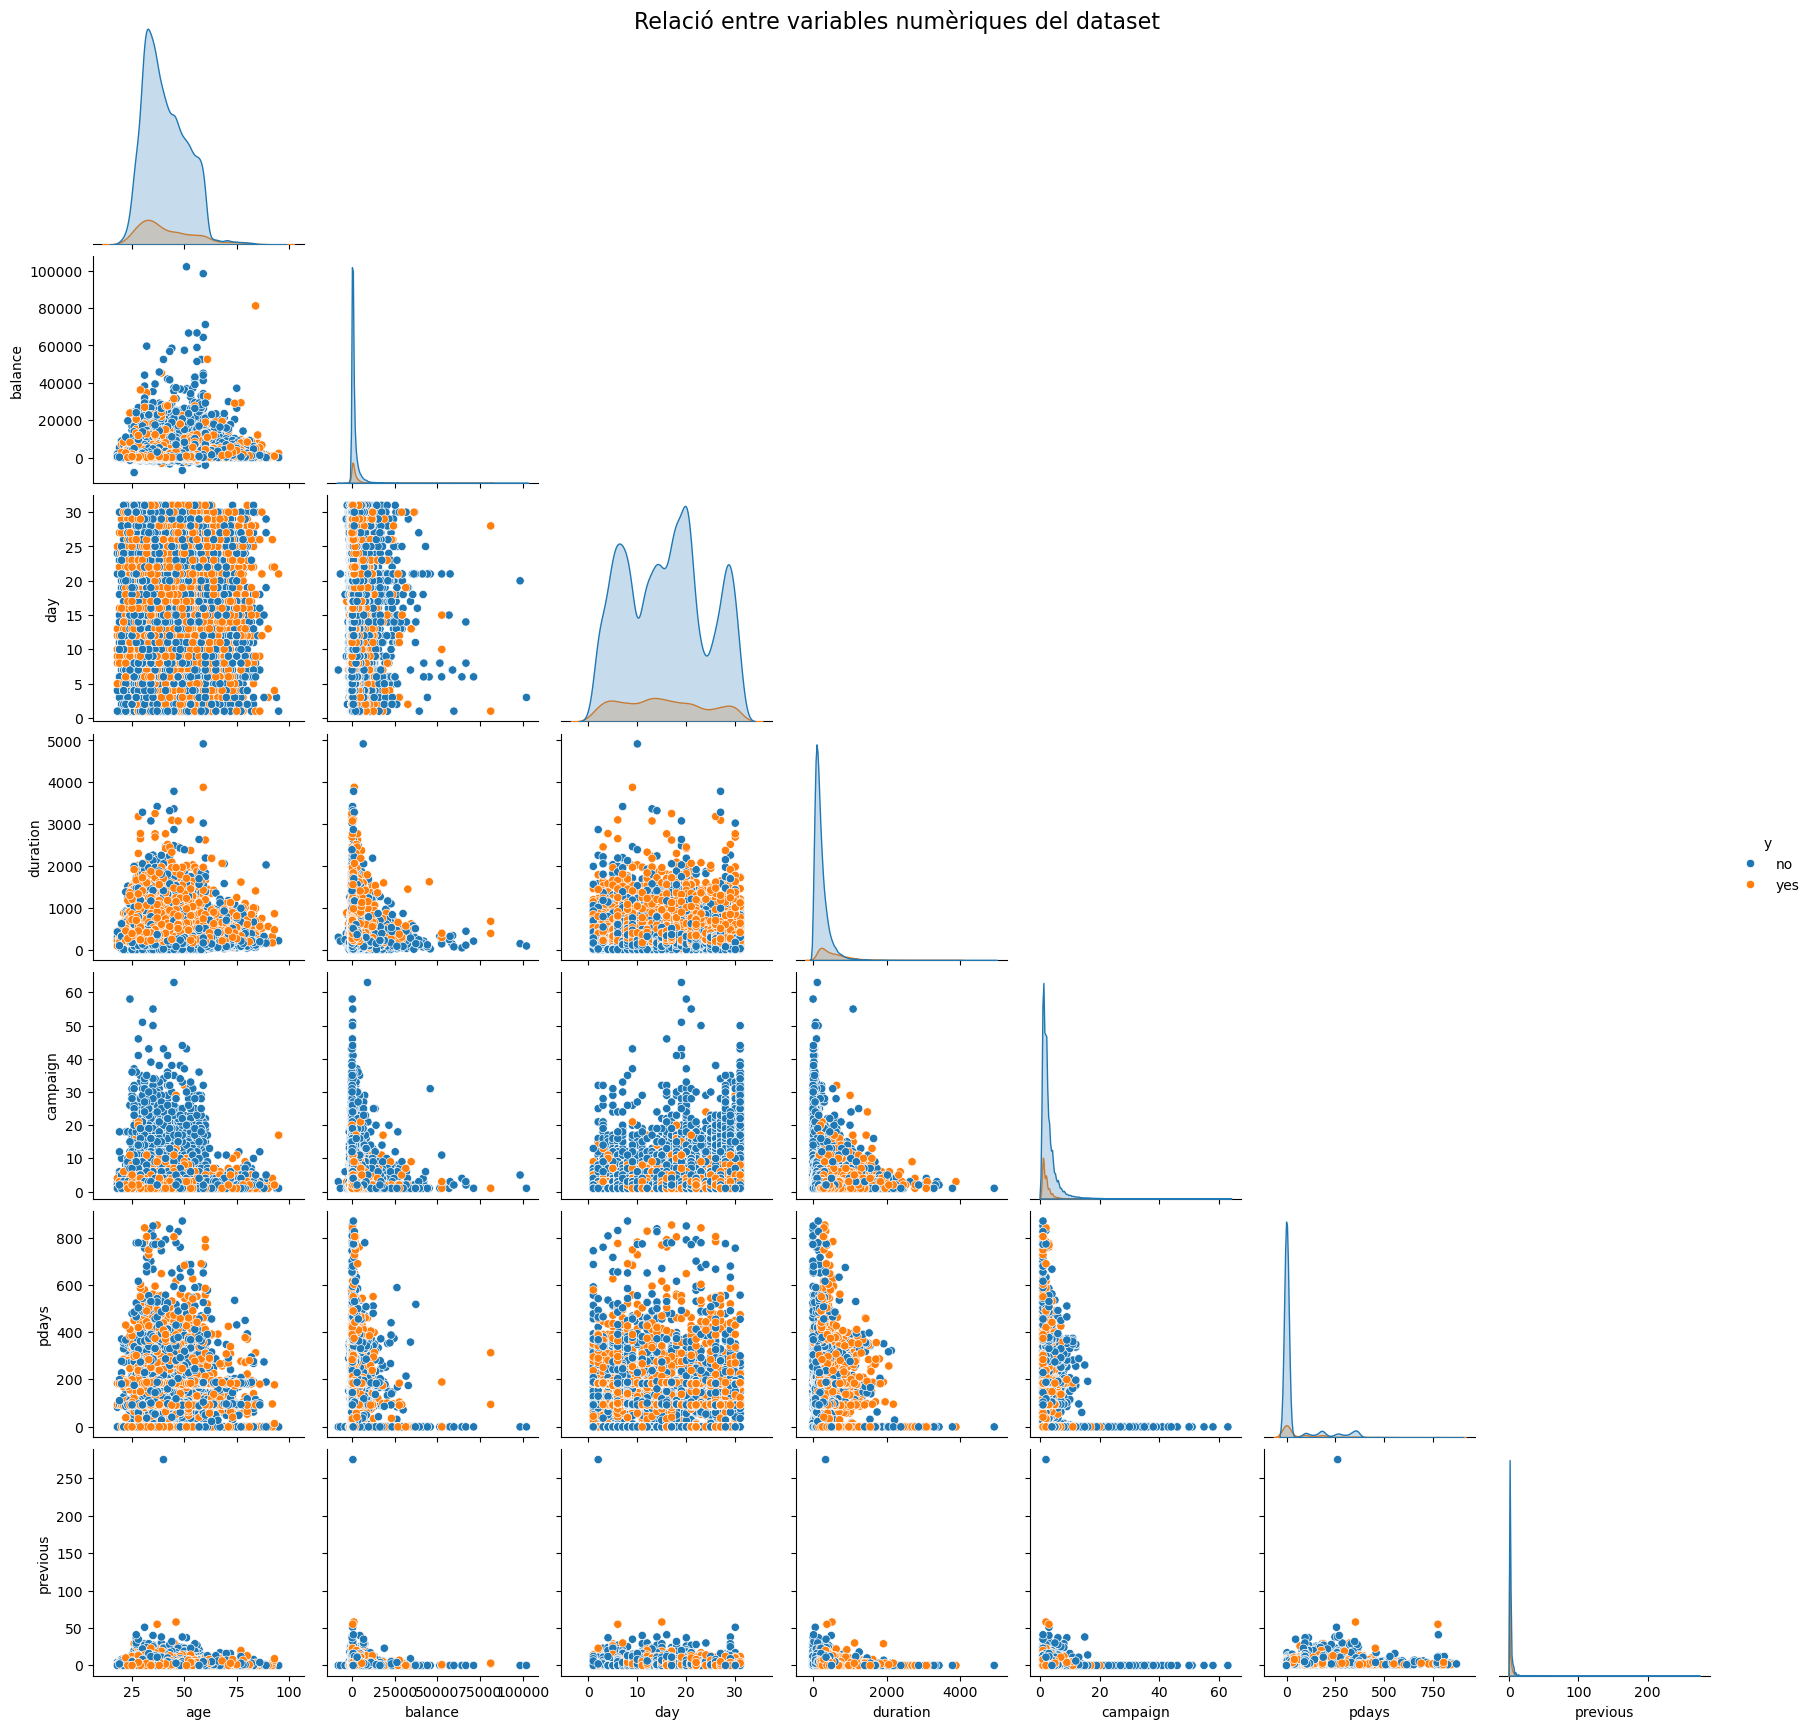

In [15]:
g = sns.pairplot(data=df,
                 corner=True,
                 hue="y")
g.fig.suptitle("Relació entre variables numèriques del dataset",
               va="baseline",
               ha="center",
               fontsize=16)


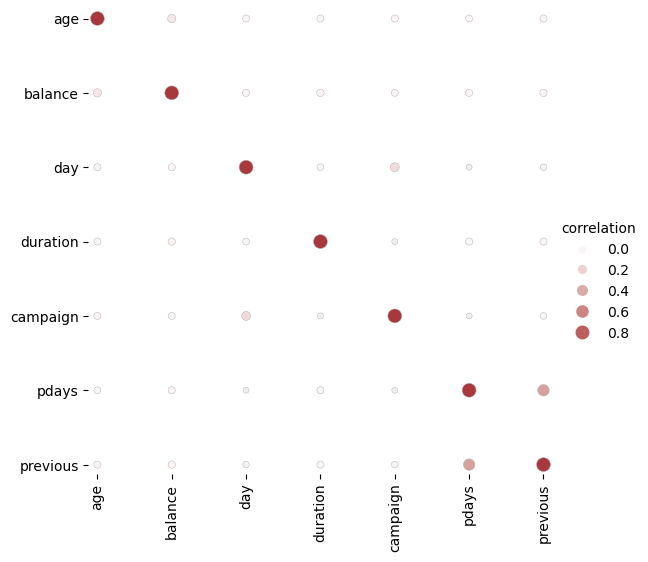

In [16]:

# Compute a correlation matrix and convert to long-form
corr_mat = df[numeric_columns].corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=6, sizes=(8, 100), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> comenta els resultats.
</div>

# Preprocessament de les dades (1.5 punts)

Un cop analitzats els atributs descriptius, és el moment de preparar-los perquè ens siguin útils amb vista a predir valors.

A partir d’aquest punt, per simplicitat, treballarem únicament amb els atributs numèrics.

En aquest apartat:
<li>Estandarditzarem (o normalitzarem) els valors dels atributs descriptius numèrics perquè les seves escales no siguin molt diferents.</li>
<li>Separarem el conjunt de dades original en dos subconjunts: entrenament i test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> quina tècnica podríem fer servir per codificar els atributs categòrics de format numèric?
</div>

In [17]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df[categorical_columns] = df[categorical_columns].apply(lambda col: le.fit_transform(col))


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> conserva els atributs descriptius numèrics i estandarditza’ls, aquest serà el nou conjunt d’atributs descriptius amb el qual treballarem a partir d’ara.
<hr>
Suggeriment: utilitzeu "StandardScaler" de <i>preprocessing</i>.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> separa els atributs descriptius escalats i la variable objectiu en els subconjunts d’entrenament i de prova.
<hr>
Suggeriment: per separar entre entrenament i prova podeu utilitzar "train_test_split" de sklearn.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> valora si la decisió de transformar el conjunt de dades (estandardització) abans de realitzar la separació del conjunt de dades en els subconjunts d’entrenament i prova, és una bona idea.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> en aquest exercici hem estandarditzat els valors dels atributs descriptius perquè les seves escales no siguin molt diferents (unificar-les). Què ens aporta estandarditzar els atributs descriptius?, hi ha alguna situació o escenari on sigui imprescindible?
</div>

# Reducció de la dimensionalitat (2.5 punts)

En aquest apartat reprendrem l'anàlisi gràfica de la distribució de la classe al llarg de les mostres del conjunt de dades. En el segon apartat vam poder observar si les variables descriptives per separat eren molt prometedores o no per predir la classe. Aquí intentarem determinar si la seva combinació pot ajudar-nos a establir si es contractarà el dipòsit de manera més eficaç que utilitzant els atributs per separat. Amb aquest propòsit, reduirem la dimensionalitat del problema a només dos atributs, que seran la projecció dels atributs descriptius originals, i observarem com es distribueixen les mostres de cada classe.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
    <li>Aplica el mètode de reducció de la dimensionalitat Principal Component Analysis (PCA) per reduir a 2 dimensions el conjunt de dades complet amb tots els atributs (*features*).</li>
    <li>Genera un gràfic en 2D amb el resultat del PCA utilitzant colors diferents per a cadascuna de les classes de la resposta, amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquest mètode.</li>
</ul>
    
NOTA: Tingueu cura de no incloure la variable objectiu en la reducció de dimensionalitat. Volem explicar la variable objectiu en funció de la resta de variables reduïdes a dues dimensions.

<hr>
Suggeriment: no és necessari que programeu l'algorisme de PCA, podeu utilitzar la implementació disponible a la llibreria de <i>scikit-learn</i>.<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong><br>
<ul>
    <li>Repeteix la reducció de la dimensionalitat, però en aquest cas utilitzant TSNE. Podeu trobar més informació sobre aquest algorisme en l'enllaç: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Igual que abans, genereu un gràfic en 2D amb el resultat del TSNE fent servir colors diferents per a cadascuna de les classes de la resposta (y), amb l'objectiu de visualitzar si és possible separar eficientment les classes amb aquest mètode.</li>
</ul>

<hr>
Suggeriment: no és necessari que programeu l'algorisme TSNE, podeu fer servir la implementació disponible a la llibreria de <i>scikit-learn</i>.<br>
Suggeriment: a part d'especificar el nombre de components, proveu els paràmetres "learning_rate" i "perplexity".<br>
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> observant els dos gràfics, consideres que la reducció de dimensionalitat ha funcionat bé?. Ha aconseguit separar les classes correctament?. Quin dels dos mètodes ha funcionat millor?. Per què obtenim resultats tan diferents?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Pregunta:</strong> Què en penses de TSNE com a opció per reduir la dimensionalitat? Què et sembla que només tingui el mètode "fit_transform" però no tingui "transform"? Coneixes alguna altra opció que, amb prestacions similars, eviti els problemes que té TSNE?
</div>

# Conjunts desequilibrats de dades (2.5 punts)

En els problemes de classificació, és molt comú trobar conjunts de dades molt desequilibrats. En la indústria existeixen múltiples exemples, com ara la detecció de frau o la fuga de clients. Aquest apartat se centra en l’anàlisi d’aquest tipus de conjunts.

El cas del _dataset_ amb el qual estem treballant (_Bank Marketing_) és un d’ells, ja que podem observar com la classe "no" apareix amb una freqüència fins a deu vegades més gran que la classe "yes".

A continuació, analitzarem la distribució del nostre conjunt de dades. Per fer-ho, farem servir la funció <strong>show_distribution</strong> definida a la següent cel·la:

In [18]:
def show_distribution(y_df):
    freq = y_df["y"].value_counts()
    plt.pie(freq, labels=('No subscription ('+str(freq["no"])+')', 'Subscription ('+str(freq["yes"])+')'), autopct='%1.1f%%')
    plt.title("Term deposit subscription distribution")
    plt.show()

In [19]:
show_distribution(y)

NameError: name 'y' is not defined

Com es pot observar, el conjunt està força desequilibrat, ja que, pràcticament, només una desena part de les mostres corresponen a la contractació del dipòsit.

Per tractar el problema de dades desequilibrades, analitzarem la tècnica de sobremostreig (_oversampling_) de la classe minoritària. A la literatura hi ha més tècniques per afrontar aquest problema, com el submostreig (_undersampling_) de la classe majoritària, però en aquesta PAC, ens centrarem només en la tècnica de sobremostreig.

## Oversampling

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> incrementeu les mostres de la classe minoritària fins a arribar a un nombre similar al dels elements de la classe majoritària aplicant les tècniques següents:
<ul>
    <li>Duplicació aleatòria (_random over-sampling_), fixant random_state=10.</li>
    <li>SMOTE (_Synthetic Minority Over-sampling Technique_), fixant random_state=10.</li>
    <li>ADASYN (_Adaptive Synthetic Sampling_), fixant random_state=10.</li>
</ul>
    
Per acabar, verifiqueu amb l’ajuda de la funció <strong>show_distribution</strong>, que després de l’aplicació d’aquestes tècniques, el nombre de mostres de la classe minoritària s’ha igualat al de la majoritària.
<hr>
Suggeriment: per aplicar la replicació aleatòria podeu fer servir "RandomOverSampler" d'<i>imblearn</i>.<br>
Suggeriment: per aplicar SMOTE podeu utilitzar "SMOTE" d'<i>imblearn</i>.<br>
Suggeriment: per aplicar ADASYN podeu utilitzar "ADASYN" d'<i>imblearn</i>.<br>
</div>

El resultat d'aplicar aquestes tècniques hauria d'haver produit un nombre similar de mostres per a les dues classes. No obstant això, cadascun dels mètodes genera les noves mostres de la classe minoritària de manera diferent. Amb l'objectiu de comprendre millor i de manera visual com es generen aquestes noves mostres, a partir d'ara, farem servir la descomposició a dues dimensions que hagi mostrat un millor comportament a l'apartat anterior.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> mostreu, amb un gràfic de dispersió en funció de les dues components resultants de la reducció dimensional prèvia, la distribució de les contractacions del conjunt de dades original, i del que s'ha obtingut després d'aplicar Random Over Sampling.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> Quines diferències i similituds trobes en les dues imatges anteriors? Justifiqueu la resposta tenint en compte la distribució d’ambdós conjunts, és a dir, la quantitat d’avaries de motor.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Exercici:</strong> mostreu, amb un gràfic de dispersió en funció de les dues components resultants de la reducció dimensional prèvia, la distribució de les contractacions dels tres conjunts de dades obtinguts en aplicar les tres tècniques de sobremostreig.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisi:</strong> considerant el nombre de mostres amb contractació en cada conjunt, comenteu les diferències i semblances a les imatges de l’exercici anterior. Justifiqueu la resposta tenint en compte el comportament de cadascuna de les tècniques utilitzades.
</div>